In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-04-27 09:00:17--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-04-27 09:00:17 (60.8 MB/s) - ‘helper.py’ saved [2813/2813]



##Importing necessary library

In [0]:
import torch 
import helper
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


import torch.nn as nn
import torch.nn.functional as F
from torch import optim


##Loading Fashion MNIST Dataset

In [2]:
# Define a transform to normalize the data
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),(0.5,))])

#Download and prepare train data
trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',train=True,transform=transform,download=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

#Download and prepare test data
testset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw




Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


#Visualizing data

torch.Size([64, 1, 28, 28])

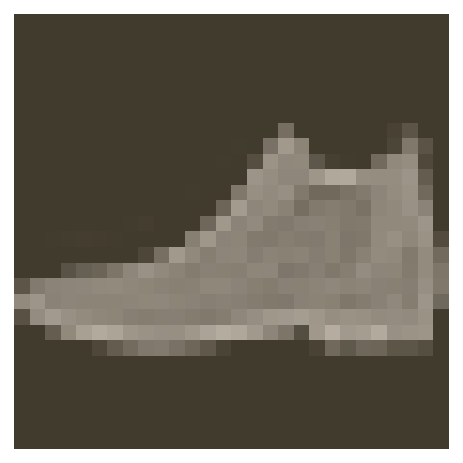

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])
image.shape
 

##Building Neural Network

In [4]:
model=nn.Sequential(nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(256,128),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)


epoch=30
train_loss,test_loss,accuracy=[],[],[]

for e in range(epoch):
  running_loss=0
  for image,label in trainloader:
    image=image.view(image.shape[0],-1)

    optimizer.zero_grad()
    #forward pass || backward pass || 
    output=model.forward(image)
    loss=criterion(output,label)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
  
  else:
    t_loss=0
    accuracy=0
    with torch.no_grad():
      model.eval()
      for img,lbl in testloader:
        img=img.view(img.shape[0],-1)
        out=model.forward(img)
        t_loss+=criterion(out,lbl)

        top_p,top_cls=out.topk(1,dim=1)
        equal=top_cls==lbl.view(*top_cls.shape)
        accuracy+=torch.mean(equal.type(torch.FloatTensor))
        model.train()

    train_loss.append(running_loss/len(trainloader))
    test_loss.append(t_loss/len(testloader))

    print('epoch:{}/{}..'.format(e+1,epoch),
              'Training Loss:{:.3f}..'.format(running_loss/len(trainloader)),
              'Test Loss:{:.3f}..'.format(t_loss/len(testloader)),
              'Accuracy(%):{:.3f}..'.format(accuracy/len(testloader)*100))
     

 



 
 


epoch:1/30.. Training Loss:2.287.. Test Loss:2.262.. Accuracy(%):23.547..
epoch:2/30.. Training Loss:2.217.. Test Loss:2.154.. Accuracy(%):31.847..
epoch:3/30.. Training Loss:2.028.. Test Loss:1.866.. Accuracy(%):40.396..
epoch:4/30.. Training Loss:1.672.. Test Loss:1.505.. Accuracy(%):45.661..
epoch:5/30.. Training Loss:1.391.. Test Loss:1.297.. Accuracy(%):51.164..
epoch:6/30.. Training Loss:1.225.. Test Loss:1.172.. Accuracy(%):55.504..
epoch:7/30.. Training Loss:1.107.. Test Loss:1.058.. Accuracy(%):59.763..
epoch:8/30.. Training Loss:1.022.. Test Loss:0.988.. Accuracy(%):62.241..
epoch:9/30.. Training Loss:0.952.. Test Loss:0.935.. Accuracy(%):64.988..
epoch:10/30.. Training Loss:0.900.. Test Loss:0.888.. Accuracy(%):65.734..
epoch:11/30.. Training Loss:0.856.. Test Loss:0.843.. Accuracy(%):67.884..
epoch:12/30.. Training Loss:0.822.. Test Loss:0.823.. Accuracy(%):68.730..
epoch:13/30.. Training Loss:0.794.. Test Loss:0.793.. Accuracy(%):69.904..
epoch:14/30.. Training Loss:0.768.

##Plotting Training and validation loss

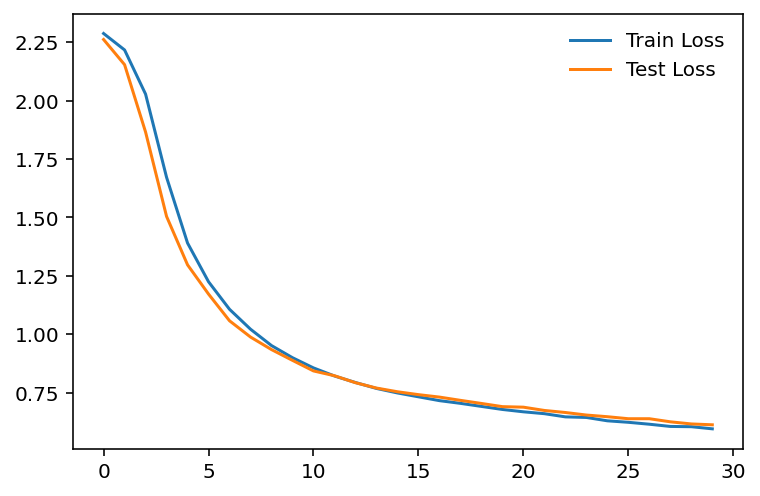

In [5]:
plt.plot(train_loss,label="Train Loss")
plt.plot(test_loss,label="Test Loss")
plt.legend(frameon=False)


##Testing by test data

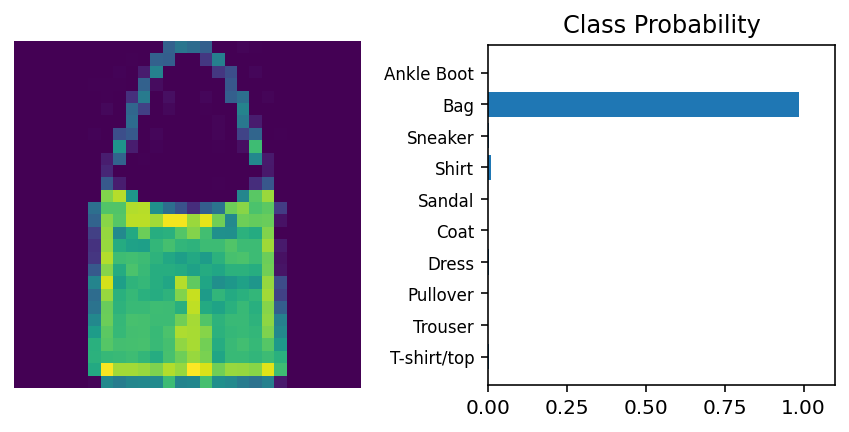

In [6]:
img,lbl=next(iter(testloader))
img=img[0].view(1,-1)


with torch.no_grad():
  logit=model.forward(img)

ps=torch.exp(logit)
helper.view_classify(img.view(1,28,28),ps,version='Fashion')

